In [230]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from IPython.display import Image


In [231]:
# Load and preprocess the MNIST dataset
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [232]:
# Normalize the dataset
x_train = x_train/ 255.0
x_test  = x_test/ 255.0

In [233]:
# Flatten the 28*28 Images
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28*28)

In [234]:
x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
y_train.ndim

1

In [236]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [237]:
y_train.shape

(60000, 10)

In [238]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [239]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8664 - loss: 0.4751 - val_accuracy: 0.9553 - val_loss: 0.1568
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9609 - loss: 0.1363 - val_accuracy: 0.9643 - val_loss: 0.1213
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9725 - loss: 0.0913 - val_accuracy: 0.9709 - val_loss: 0.0988
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9821 - loss: 0.0624 - val_accuracy: 0.9707 - val_loss: 0.0965
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9722 - val_loss: 0.0901
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9882 - loss: 0.0389 - val_accuracy: 0.9701 - val_loss: 0.0979
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0286 - val_accuracy: 0.9754 - val_loss: 0.0883
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9928 - loss: 0.0233 

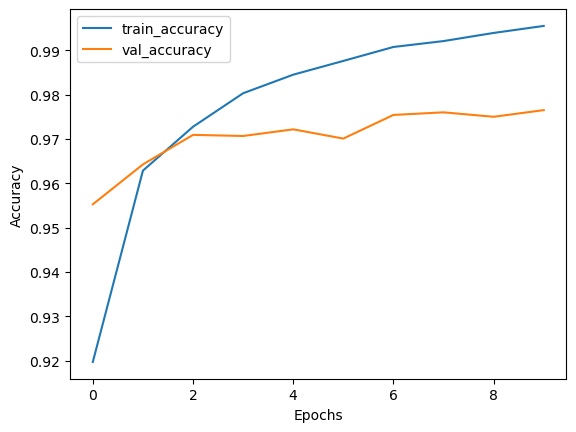

In [240]:
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
